# Лабораторная работа №2

In [1]:
#.venv/Scripts/Activate.ps1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc

In [2]:
df = pd.read_csv('ready_energy_dataset.csv')

df = df.dropna()

energy_df = df.drop(['date', 'year', 'Unnamed: 0'], axis=1)

first_half_time = []
for i in range(len(df['year'])):
  if (df['year'].values[i] < 2017):
    first_half_time.append(1)
  else:
    first_half_time.append(0)
df['first_half_time'] = first_half_time

energy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35018 entries, 0 to 35063
Data columns (total 20 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation_biomass                           35018 non-null  float64
 1   generation_fossil_brown                      35018 non-null  float64
 2   generation_fossil_gas                        35018 non-null  float64
 3   generation_fossil_hard_coal                  35018 non-null  float64
 4   generation_fossil_oil                        35018 non-null  float64
 5   generation_hydro_pumped_storage_consumption  35018 non-null  float64
 6   generation_hydro_run_of_river_poundage       35018 non-null  float64
 7   generation_hydro_water_reservoir             35018 non-null  float64
 8   generation_nuclear                           35018 non-null  float64
 9   generation_other                             35018 non-null  float64
 10

In [3]:
X_train, X_test, y_train, y_test = train_test_split(energy_df, df['first_half_time'], stratify=df['first_half_time'], random_state=5) 
#stratify - чтобы распределение целевых классов было примерно одинаковым в обучающем и тестовом наборах данных
print(X_train)

       generation_biomass  generation_fossil_brown  generation_fossil_gas  \
2198                483.0                      0.0                 5023.0   
24711               323.0                    907.0                 9867.0   
28759               234.0                      0.0                 8378.0   
4043                464.0                    936.0                 4349.0   
23867               364.0                    897.0                 9532.0   
...                   ...                      ...                    ...   
17853               360.0                    914.0                 7531.0   
21790               380.0                    293.0                 9616.0   
22225               395.0                    408.0                 5531.0   
27217               383.0                    401.0                 5003.0   
24129               368.0                    656.0                 8276.0   

       generation_fossil_hard_coal  generation_fossil_oil  \
2198          

In [4]:
#1.a) К-ближайших соседей
model_KNeighbors = KNeighborsClassifier()
param_grid_KNN = {
    "n_neighbors": [2, 3, 4, 5]
}
grid_search_KNN = GridSearchCV(model_KNeighbors, param_grid_KNN, cv=5)
grid_search_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5]})

In [5]:
best_model_KNN = grid_search_KNN.best_estimator_
best_params_KNN = grid_search_KNN.best_params_
best_score_KNN = grid_search_KNN.best_score_
pred_KNN = best_model_KNN.predict(X_test)
KNN_matrix = confusion_matrix(y_test, pred_KNN)
print(f"best params: {best_params_KNN}")
print(f"best score: {best_score_KNN}")
print(f"Train score: {best_model_KNN.score(X_train, y_train)}")
print(f"Test score: {best_model_KNN.score(X_test, y_test)}")
print(f"Confusion_matrix:\n{confusion_matrix(y_test, pred_KNN)}")
print(f"Precision, recall and f1-score:\n{classification_report(y_test, pred_KNN, target_names=['0','1'])}")
print(f"ROC-AUC score: {roc_auc_score(y_test, best_model_KNN.predict_proba(X_test)[:, 1])}")
print(f"CV_results: {pd.DataFrame(grid_search_KNN.cv_results_)}")

best params: {'n_neighbors': 3}
best score: 0.8673039045327018
Train score: 0.9519095305182196
Test score: 0.8710451170759566
Confusion_matrix:
[[3804  575]
 [ 554 3822]]
Precision, recall and f1-score:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4379
           1       0.87      0.87      0.87      4376

    accuracy                           0.87      8755
   macro avg       0.87      0.87      0.87      8755
weighted avg       0.87      0.87      0.87      8755

ROC-AUC score: 0.9323387747238043
CV_results:    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.010995      0.004140         0.724490        0.167630   
1       0.009399      0.001200         0.565993        0.050482   
2       0.009415      0.001195         0.577335        0.047247   
3       0.011997      0.003902         0.976016        0.749580   

  param_n_neighbors              params  split0_test_score  split1_test_score  \
0      

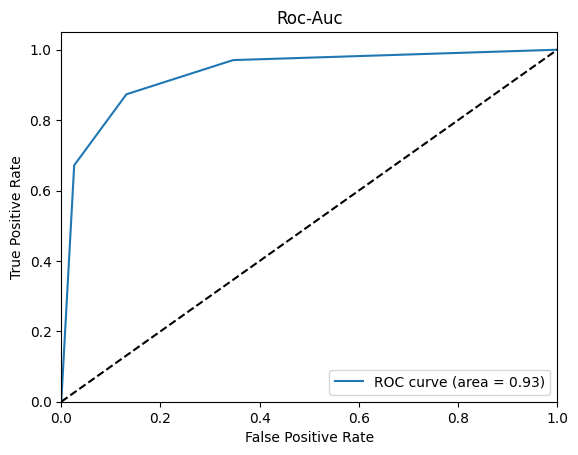

In [6]:
x_pred_prob = best_model_KNN.predict_proba(X_test)[:, 1]

fpr, tpr,t = roc_curve(y_test, x_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc-Auc')
plt.legend(loc="lower right")
plt.show()

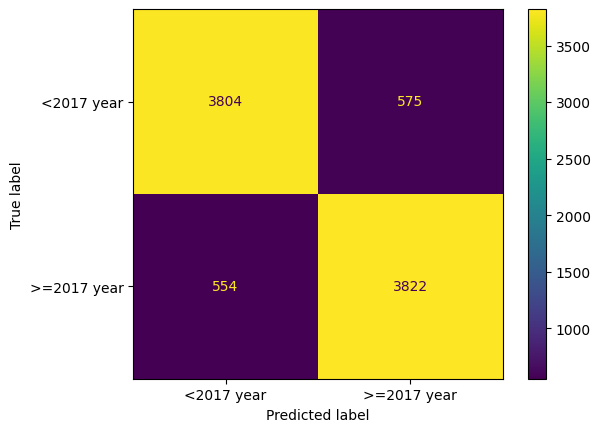

In [7]:
ConfusionMatrixDisplay(confusion_matrix=KNN_matrix, display_labels=['<2017 year', '>=2017 year']).plot()

In [8]:
#1.b) SVM
linear_SVC_model = LinearSVC(random_state=5)
grid_search_linear_SVC_params = {
    "C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
}
grid_search_linear_SVC = GridSearchCV(linear_SVC_model, grid_search_linear_SVC_params, cv=5)
grid_search_linear_SVC.fit(X_train, y_train)

c:\DesktopLabels\Work\venv\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\DesktopLabels\Work\venv\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\DesktopLabels\Work\venv\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\DesktopLabels\Work\venv\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\DesktopLabels\Work\venv\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\DesktopLabels\Work\venv\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase

GridSearchCV(cv=5, estimator=LinearSVC(random_state=5),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]})

In [9]:
linear_SVC_best_model = grid_search_linear_SVC.best_estimator_
linear_SVC_best_params = grid_search_linear_SVC.best_params_
linear_SVC_best_score = grid_search_linear_SVC.best_score_
linear_SVC_predict = linear_SVC_best_model.predict(X_test)
linear_SVC_matrix = confusion_matrix(y_test, linear_SVC_predict)

print(f"best params: {linear_SVC_best_params}")
print(f"best score: {linear_SVC_best_score}")
print(f"Train score: {linear_SVC_best_model.score(X_train, y_train)}")
print(f"Test score: {linear_SVC_best_model.score(X_test, y_test)}")
print(f"Confusion_matrix:\n{confusion_matrix(y_test, linear_SVC_predict)}")
print(f"Precision, recall and f1-score:\n{classification_report(y_test, linear_SVC_predict, target_names=['0', '1'])}")
print(f"ROC-AUC score: {roc_auc_score(y_test, linear_SVC_best_model.decision_function(X_test))}")
print(f"CV_results: {pd.DataFrame(grid_search_linear_SVC.cv_results_)}")

best params: {'C': 0.001}
best score: 0.8976511952912991
Train score: 0.5338308647146175
Test score: 0.5353512278697887
Confusion_matrix:
[[ 311 4068]
 [   0 4376]]
Precision, recall and f1-score:
              precision    recall  f1-score   support

           0       1.00      0.07      0.13      4379
           1       0.52      1.00      0.68      4376

    accuracy                           0.54      8755
   macro avg       0.76      0.54      0.41      8755
weighted avg       0.76      0.54      0.41      8755

ROC-AUC score: 0.9483852423461986
CV_results:    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       4.621349      1.300975         0.002606        0.000495  0.0001   
1       3.033578      0.220911         0.002606        0.000496   0.001   
2       2.730200      0.080228         0.001982        0.000017    0.01   
3       2.764204      0.151303         0.002193        0.000403     0.1   
4       2.741797      0.061641         0.002602        

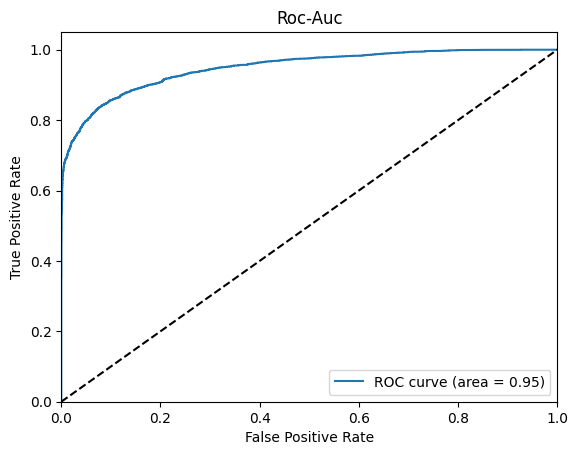

In [10]:
x_pred_prob = linear_SVC_best_model.decision_function(X_test)

fpr, tpr,t = roc_curve(y_test, x_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc-Auc')
plt.legend(loc="lower right")
plt.show()

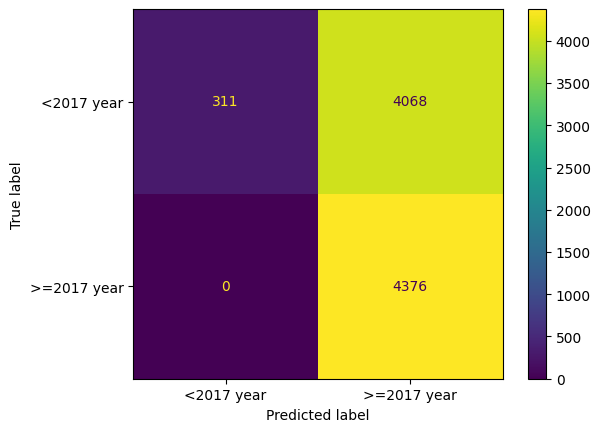

In [11]:
ConfusionMatrixDisplay(confusion_matrix=linear_SVC_matrix, display_labels=['<2017 year', '>=2017 year']).plot()

In [12]:
#1.c) Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=5)
grid_search_decision_tree_params = {
    "max_depth": [None, 4, 5, 6, 7, 8, 9, 10],
}
grid_search_decision_tree = GridSearchCV(decision_tree_model, grid_search_decision_tree_params, cv=5)
grid_search_decision_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'max_depth': [None, 4, 5, 6, 7, 8, 9, 10]})

In [13]:
#Просмотр лучших параметров, найденных грид сёрчем и лучшей правильности
decision_tree_best_model = grid_search_decision_tree.best_estimator_
decision_tree_best_params = grid_search_decision_tree.best_params_
decision_tree_best_score = grid_search_decision_tree.best_score_
decision_tree_predict = decision_tree_best_model.predict(X_test)
decision_tree_matrix = confusion_matrix(y_test, decision_tree_predict)

print(f"best params: {decision_tree_best_params}")
print(f"best score: {decision_tree_best_score}")
print(f"Train score: {decision_tree_best_model.score(X_train, y_train)}")
print(f"Test score: {decision_tree_best_model.score(X_test, y_test)}")
print(f"Confusion_matrix:\n{confusion_matrix(y_test, decision_tree_predict)}")
print(f"Precision, recall and f1-score:\n{classification_report(y_test, decision_tree_predict, target_names=['0', '1'])}")
print(f"ROC-AUC score: {roc_auc_score(y_test, decision_tree_best_model.predict_proba(X_test)[:, 1])}")
print(f"CV_results: {pd.DataFrame(grid_search_decision_tree.cv_results_)}")

best params: {'max_depth': None}
best score: 0.9799337092255991
Train score: 1.0
Test score: 0.9794403198172473
Confusion_matrix:
[[4277  102]
 [  78 4298]]
Precision, recall and f1-score:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4379
           1       0.98      0.98      0.98      4376

    accuracy                           0.98      8755
   macro avg       0.98      0.98      0.98      8755
weighted avg       0.98      0.98      0.98      8755

ROC-AUC score: 0.9794412567376373
CV_results:    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.364411      0.021336         0.002989        0.000012   
1       0.140615      0.004023         0.002786        0.000394   
2       0.187005      0.021818         0.002195        0.000402   
3       0.219805      0.026124         0.002802        0.000410   
4       0.234195      0.007276         0.002400        0.000800   
5       0.298613      0.024106      

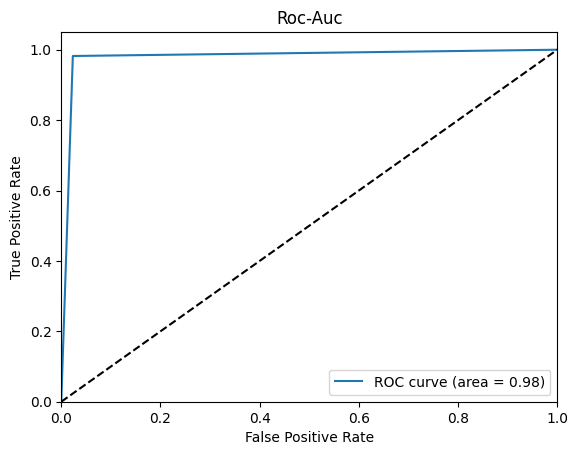

In [14]:
x_pred_prob = decision_tree_best_model.predict_proba(X_test)[:, 1]

fpr, tpr,t = roc_curve(y_test, x_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc-Auc')
plt.legend(loc="lower right")
plt.show()

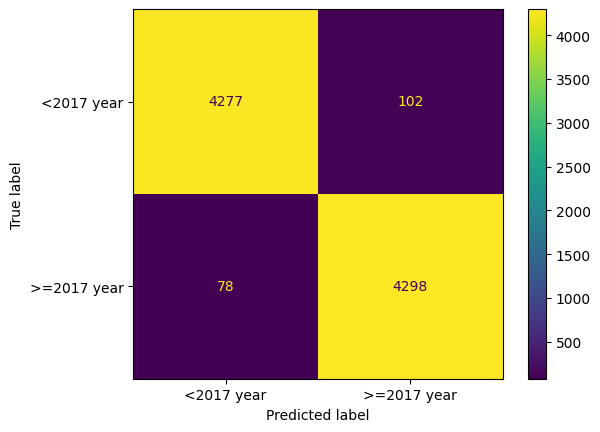

In [15]:
ConfusionMatrixDisplay(confusion_matrix=decision_tree_matrix, display_labels=['<2017 year', '>=2017 year']).plot()

In [16]:
another_decision_tree_model = DecisionTreeClassifier(random_state=5, max_depth=5)
another_decision_tree_model.fit(X_train, y_train)
print(f"Правильность на обучающем наборе: {another_decision_tree_model.score(X_train, y_train)}")
print(f"Правильность на тестовом наборе: {another_decision_tree_model.score(X_test, y_test)}")

Правильность на обучающем наборе: 0.9339374785820356
Правильность на тестовом наборе: 0.9246145059965734


generation_biomass                           35018 non-null  float64
 1   generation_fossil_brown                      35018 non-null  float64
 2   generation_fossil_gas                        35018 non-null  float64
 3   generation_fossil_hard_coal                  35018 non-null  float64
 4   generation_fossil_oil                        35018 non-null  float64
 5   generation_hydro_pumped_storage_consumption  35018 non-null  float64
 6   generation_hydro_run_of_river_poundage       35018 non-null  float64
 7   generation_hydro_water_reservoir             35018 non-null  float64
 8   generation_nuclear                           35018 non-null  float64
 9   generation_other                             35018 non-null  float64
 10  generation_other_renewable                   35018 non-null  float64
 11  generation_solar                             35018 non-null  float64
 12  generation_waste                             35018 non-null  float64
 13  generation_wind_onshore                      35018 non-null  float64
 14  forecast_solar_day_ahead                     35018 non-null  float64
 15  forecast_wind_onshore_day_ahead              35018 non-null  float64
 16  total_load_forecast                          35018 non-null  float64
 17  total_load_actual                            35018 non-null  float64
 18  price_day_ahead                              35018 non-null  float64
19  price_actual   

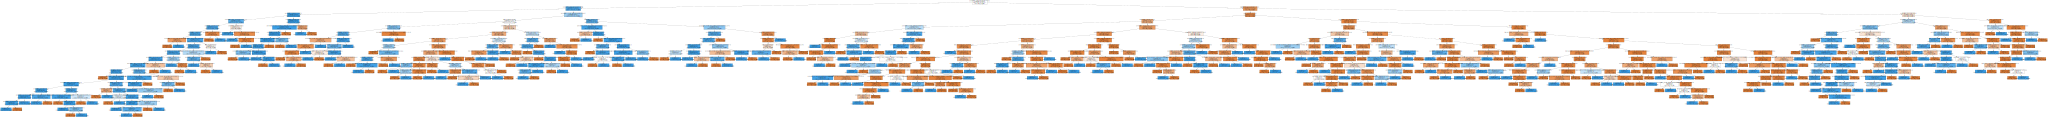

In [17]:
#2.c Визуализацияя дерева решений
export_graphviz(decision_tree_best_model, out_file="tree.dot", class_names=["first_half_time", "second_half_time"],
              feature_names=['generation_biomass', 'generation_fossil_brown', 'generation_fossil_gas', 'generation_fossil_hard_coal', 'generation_fossil_oil', 'generation_hydro_pumped_storage_consumption',
              'generation_hydro_run_of_river_poundage', 'generation_hydro_water_reservoir', 'generation_nuclear', 'generation_other', 'generation_other_renewable', 'generation_solar', 'generation_waste',
              'generation_wind_onshore', 'forecast_solar_day_ahead', 'forecast_wind_onshore_day_ahead', 'total_load_forecast', 'total_load_actual', 'price_day_ahead', 'price_actual'], impurity=False, filled=True)
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [18]:
#1d Random forest
model_random_forest = RandomForestClassifier(random_state=5, n_jobs=-1)
param_grid_random_forest = {"n_estimators": [2, 3, 4, 5, 6]}
grid_search_random_forest = GridSearchCV(model_random_forest, param_grid_random_forest, cv=5)
grid_search_random_forest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=5),
             param_grid={'n_estimators': [2, 3, 4, 5, 6]})

In [19]:
#Просмотр лучших параметров, найденных грид сёрчем и лучшей правильности
random_forest_best_model = grid_search_random_forest.best_estimator_
random_forest_best_params = grid_search_random_forest.best_params_
random_forest_best_score = grid_search_random_forest.best_score_
random_forest_predict = random_forest_best_model.predict(X_test)
random_forest_matrix = confusion_matrix(y_test, random_forest_predict)

print(f"best params: {random_forest_best_params}")
print(f"best score: {random_forest_best_score}")
print(f"Train score: {random_forest_best_model.score(X_train, y_train)}")
print(f"Test score: {random_forest_best_model.score(X_test, y_test)}")
print(f"Confusion_matrix:\n{confusion_matrix(y_test, random_forest_predict)}")
print(f"Precision, recall and f1-score:\n{classification_report(y_test, random_forest_predict, target_names=['0', '1'])}")
print(f"ROC-AUC score: {roc_auc_score(y_test, random_forest_best_model.predict_proba(X_test)[:, 1])}")
print(f"CV_results: {pd.DataFrame(grid_search_random_forest.cv_results_)}")

best params: {'n_estimators': 5}
best score: 0.9875871677577635
Train score: 0.999428854281689
Test score: 0.9897201599086236
Confusion_matrix:
[[4352   27]
 [  63 4313]]
Precision, recall and f1-score:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4379
           1       0.99      0.99      0.99      4376

    accuracy                           0.99      8755
   macro avg       0.99      0.99      0.99      8755
weighted avg       0.99      0.99      0.99      8755

ROC-AUC score: 0.9988968821611206
CV_results:    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.476877      1.217208         0.023576        0.004678   
1       0.208879      0.012417         0.017572        0.009366   
2       0.243116      0.016780         0.034837        0.002201   
3       0.233489      0.008221         0.037100        0.002219   
4       0.239931      0.005603         0.040011        0.001705   

  param_n_estimators 

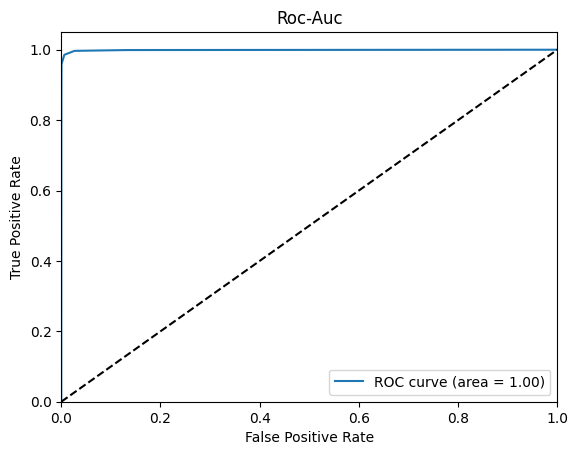

In [20]:
x_pred_prob = random_forest_best_model.predict_proba(X_test)[:, 1]

fpr, tpr,t = roc_curve(y_test, x_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc-Auc')
plt.legend(loc="lower right")
plt.show()

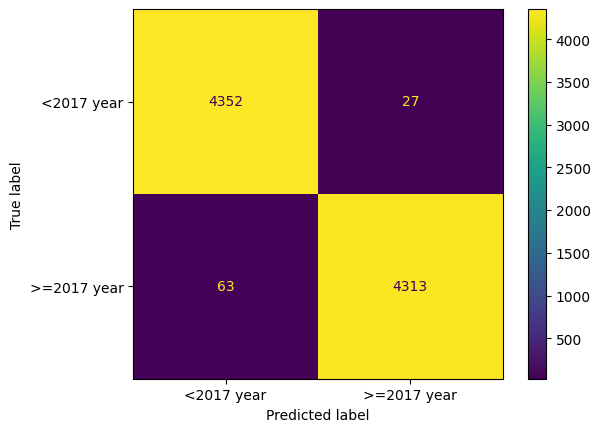

In [21]:
ConfusionMatrixDisplay(confusion_matrix=random_forest_matrix, display_labels=['<2017 year', '>=2017 year']).plot()

Text(0, 0.5, 'Признак')

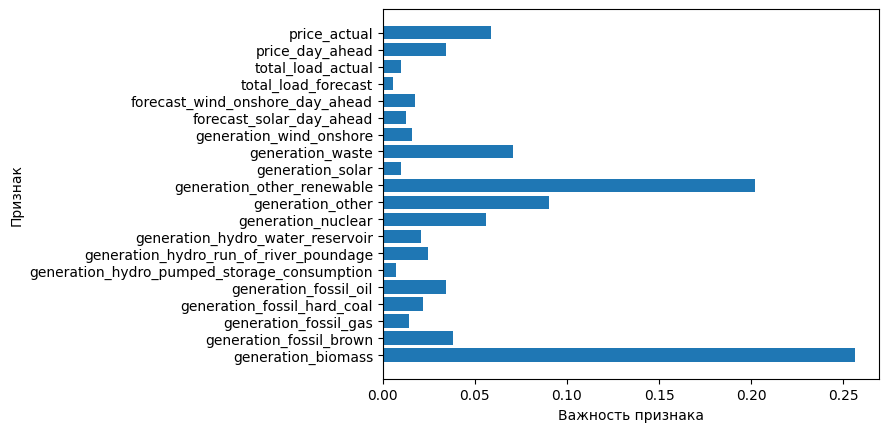

In [22]:
#2.d) Визуализация Feature Importance у случайного леса
n_features = 20
plt.barh(range(n_features), random_forest_best_model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), ['generation_biomass', 'generation_fossil_brown', 'generation_fossil_gas', 
                                   'generation_fossil_hard_coal', 'generation_fossil_oil', 
                                   'generation_hydro_pumped_storage_consumption','generation_hydro_run_of_river_poundage', 
                                   'generation_hydro_water_reservoir', 'generation_nuclear', 'generation_other', 
                                   'generation_other_renewable', 'generation_solar', 'generation_waste',
                                   'generation_wind_onshore', 'forecast_solar_day_ahead', 'forecast_wind_onshore_day_ahead', 
                                   'total_load_forecast', 'total_load_actual', 'price_day_ahead', 'price_actual'])
plt.xlabel("Важность признака")
plt.ylabel("Признак")

In [23]:
model_XGBoost = GradientBoostingClassifier(random_state=5)
param_grid_XGBoost = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.1, 0.01],
    "max_depth": [2, 3]
}
grid_search_XGBoost = GridSearchCV(model_XGBoost, param_grid_XGBoost, cv=5)
grid_search_XGBoost.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=5),
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [2, 3],
                         'n_estimators': [100, 200, 300]})

In [24]:
#Просмотр лучших параметров, найденных грид сёрчем и лучшей правильности
best_model_XGBoost = grid_search_XGBoost.best_estimator_
best_params_XGBoost = grid_search_XGBoost.best_params_
best_score_XGBoost = grid_search_XGBoost.best_score_
pred_XGBoost = best_model_XGBoost.predict(X_test)
cm_XGBoost = confusion_matrix(y_test, pred_XGBoost)
print(f"best params: {best_params_XGBoost}")
print(f"best score: {best_score_XGBoost}")
print(f"Train score: {best_model_XGBoost.score(X_train, y_train)}")
print(f"Test score: {best_model_XGBoost.score(X_test, y_test)}")
print(f"Confusion_matrix:\n{confusion_matrix(y_test, pred_XGBoost)}")
print(f"Precision, recall and f1-score:\n{classification_report(y_test, pred_XGBoost, target_names=['0', '1'])}")
print(f"ROC-AUC score: {roc_auc_score(y_test, best_model_XGBoost.predict_proba(X_test)[:, 1])}")
print(f"CV_results: {pd.DataFrame(grid_search_XGBoost.cv_results_)}")

best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
best score: 0.996573154657644
Train score: 0.9993146251380269
Test score: 0.9955454026270703
Confusion_matrix:
[[4359   20]
 [  19 4357]]
Precision, recall and f1-score:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4379
           1       1.00      1.00      1.00      4376

    accuracy                           1.00      8755
   macro avg       1.00      1.00      1.00      8755
weighted avg       1.00      1.00      1.00      8755

ROC-AUC score: 0.9998743379257742
CV_results:     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        7.761250      0.029326         0.008607        0.000481   
1       16.260730      0.427884         0.014605        0.001215   
2       23.630220      0.251768         0.020189        0.000968   
3       12.159394      0.082970         0.012199        0.000980   
4       24.877188      0.791245         0.01

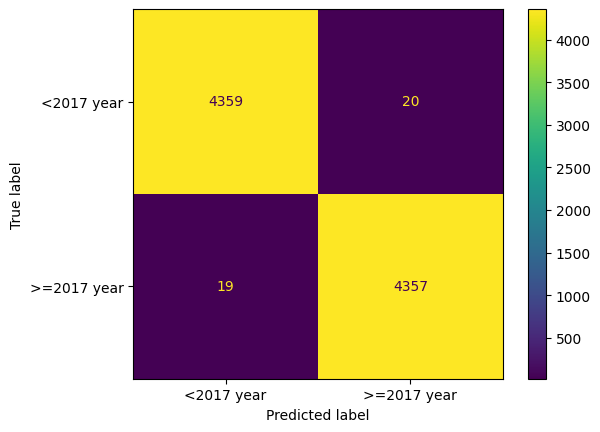

In [25]:
ConfusionMatrixDisplay(confusion_matrix=cm_XGBoost, display_labels=['<2017 year', '>=2017 year']).plot()

Text(0, 0.5, 'Признак')

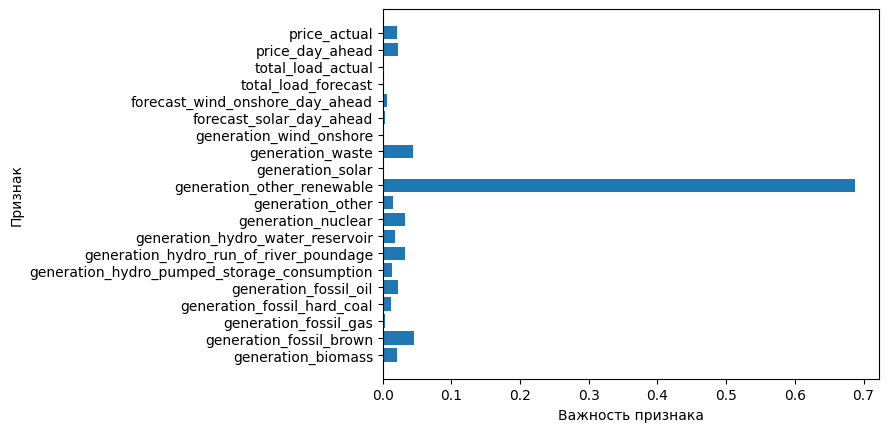

In [26]:
#2.d) Визуализация Feature Importance у градиентного бустинга
n_features = 20
plt.barh(range(n_features), best_model_XGBoost.feature_importances_, align='center')
plt.yticks(np.arange(n_features), ['generation_biomass', 'generation_fossil_brown', 'generation_fossil_gas', 'generation_fossil_hard_coal', 'generation_fossil_oil', 'generation_hydro_pumped_storage_consumption',
              'generation_hydro_run_of_river_poundage', 'generation_hydro_water_reservoir', 'generation_nuclear', 'generation_other', 'generation_other_renewable', 'generation_solar', 'generation_waste',
              'generation_wind_onshore', 'forecast_solar_day_ahead', 'forecast_wind_onshore_day_ahead', 'total_load_forecast', 'total_load_actual', 'price_day_ahead', 'price_actual'])
plt.xlabel("Важность признака")
plt.ylabel("Признак")